<a href="https://colab.research.google.com/github/Saurav-Somani/IDS_Project/blob/main/IDS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping

In [43]:
imdb = pd.read_table('imdb_labelled.txt',names=['Statement', 'Sentiment'])
amazon = pd.read_table('amazon_labelled.txt',names=['Statement', 'Sentiment'])

text = pd.concat([amazon,imdb])
text

,Statement,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [44]:
print(text.shape)
text = text.dropna()
print(text.shape)


(1748, 2)
(1748, 2)


In [45]:
text['senLen'] = text['Statement'].apply(lambda x: len(x))
data = text.sort_values(by='senLen')
plot = go.Scatter(x = data['senLen'], y = data['Sentiment'], mode='markers')
lyt = go.Layout(title="Review Length vs. Sentiment Label", xaxis=dict(title='Review Length'),yaxis=dict(title='Label'))
fig = go.Figure(data=[plot], layout=lyt)
fig

#py.iplot(fig)

In [46]:
def remove_punctuation(sentences):
    comp = re.compile("[%s\d]" % re.escape(string.punctuation))
    return " ".join(comp.sub(" ", str(sentences)).split()).lower()

text['Statement'] = text['Statement'].apply(remove_punctuation)

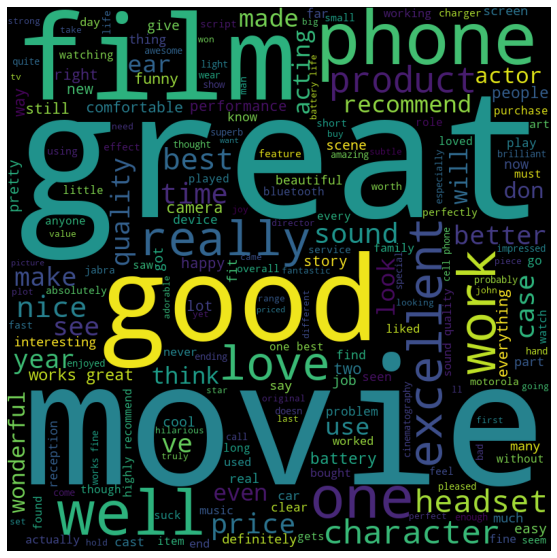

In [47]:
text_negative = text[ text['Sentiment'] == 0]
text_negative = text_negative['Statement']

text_positive = text[ text['Sentiment'] == 1]
text_positive = text_positive['Statement']

wordcloud_positive = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=800,
                      height=800,
                      min_font_size=10).generate(" ".join(text_positive))
plt.figure(figsize=(10, 10),facecolor=None)
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

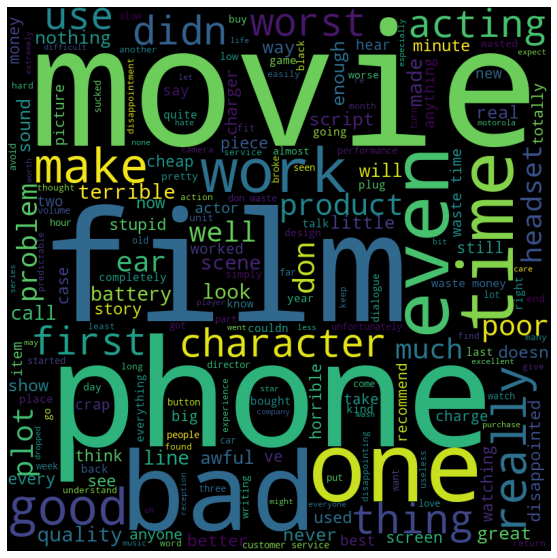

In [48]:
wordcloud_negative = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=800,
                      height=800,
                      min_font_size=10).generate(" ".join(text_negative))
plt.figure(figsize=(10, 10),facecolor=None)
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

In [49]:
print(text_positive.size)
print(text_negative.size)

886
862


In [50]:
X = text['Statement']
y = text['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
vectorizer = CountVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term = vectorizer.transform(X_test)

model = GaussianNB()
model.fit(train_term.toarray(), y_train)
predictions_train = model.predict(train_term.toarray())
predictions_test = model.predict(test_term.toarray())
print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.8715829624920534
Test Accuracy: 0.7314285714285714


In [52]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.8894836443663172, 0.8697550129366105, 0.8696612750261706, None)
(0.764367816091954, 0.7343872484975176, 0.7243725076237391, None)


In [53]:
from sklearn.naive_bayes import GaussianNB
vectorizer = TfidfVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term = vectorizer.transform(X_test)

model = GaussianNB()
model.fit(train_term.toarray(), y_train)
predictions_train = model.predict(train_term.toarray())
predictions_test = model.predict(test_term.toarray())
print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.9535918626827717
Test Accuracy: 0.72


In [54]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.953569165308709, 0.953698253557568, 0.9535870606889933, None)
(0.7223684210526315, 0.7207995819179513, 0.7196704697767171, None)


In [55]:
vectorizer = TfidfVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(train_term, y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.9319771137952956
Test Accuracy: 0.8342857142857143


In [56]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.9321290911385769, 0.9318369987063388, 0.9319373929640884, None)
(0.8351648351648351, 0.8347269401620068, 0.8342640671434637, None)


Confusion matrix, without normalization
[[768   5]
 [  7 793]]
Confusion matrix, without normalization
[[73 16]
 [14 72]]


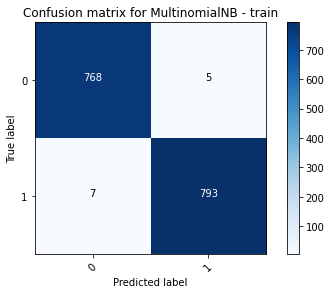

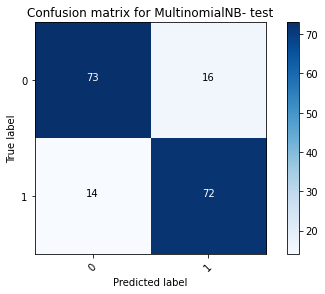

In [66]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix_train = confusion_matrix(y_train, predictions_train)
cnf_matrix_test = confusion_matrix(y_test, predictions_test)
plt.figure()
plot_confusion_matrix(cnf_matrix_train,
                      classes=[0,1],
                      title='Confusion matrix for MultinomialNB - train')
plt.figure()
plot_confusion_matrix(cnf_matrix_test,
                      classes=[0,1],
                      title='Confusion matrix for MultinomialNB- test')

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(train_term, y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.9275270184361093
Test Accuracy: 0.8171428571428572


In [58]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.9275770702779997, 0.9274401681759379, 0.9274951076320939, None)
(0.8176470588235294, 0.8174810556571728, 0.8171368861024033, None)


In [59]:
from sklearn import svm
vectorizer = CountVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term = vectorizer.transform(X_test)

model = svm.SVC()
model.fit(train_term, y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.8995549904640814
Test Accuracy: 0.7657142857142857


In [60]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.9002986016702272, 0.899961998706339, 0.8995481294661622, None)
(0.7685528756957329, 0.7647635223412594, 0.764607460385158, None)


In [61]:
vectorizer = TfidfVectorizer(min_df=2)
train_term = vectorizer.fit_transform(X_train)
test_term = vectorizer.transform(X_test)

model = svm.SVC()
model.fit(train_term, y_train)
predictions_train = model.predict(train_term)
predictions_test = model.predict(test_term)
print('Train Accuracy:', accuracy_score(y_train, predictions_train))
print('Test Accuracy:', accuracy_score(y_test, predictions_test))

Train Accuracy: 0.9923712650985378
Test Accuracy: 0.8285714285714286


In [62]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.9923510388875414, 0.9923908473479948, 0.9923693376410434, None)
(0.8286311389759666, 0.8287170107133526, 0.8285658307210032, None)


Confusion matrix, without normalization
[[768   5]
 [  7 793]]
Confusion matrix, without normalization
[[73 16]
 [14 72]]


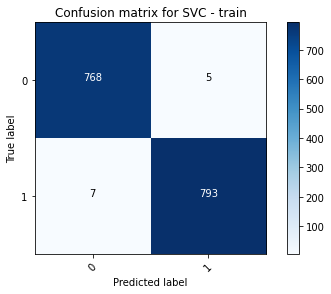

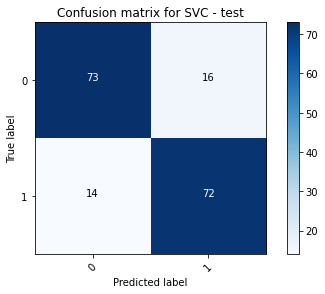

In [63]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix_train = confusion_matrix(y_train, predictions_train)
cnf_matrix_test = confusion_matrix(y_test, predictions_test)
plt.figure()
plot_confusion_matrix(cnf_matrix_train,
                      classes=[0,1],
                      title='Confusion matrix for SVC - train')
plt.figure()
plot_confusion_matrix(cnf_matrix_test,
                      classes=[0,1],
                      title='Confusion matrix for SVC - test')

In [64]:
print(precision_recall_fscore_support(y_train,predictions_train, average='macro'))
print(precision_recall_fscore_support(y_test,predictions_test, average='macro'))

(0.9923510388875414, 0.9923908473479948, 0.9923693376410434, None)
(0.8286311389759666, 0.8287170107133526, 0.8285658307210032, None)
